# 1. Install scikit-learn & required library
This project require numpy, pandas, matplotlib,... and scikit-learn be installed. Run the following code to install the requirements.

In [ ]:
from IPython.core.pylabtools import figsize
!python -m pip install -U scikit-learn
!python -m pip show scikit-learn
!python -c "import sklearn; sklearn.show_versions()"
!python -m pip install matplotlib
!python -m pip install graphviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 2. Preparing the datasets
The following code will download the dataset heart-disease from URL.

• Binary class dataset: The [UCI Heart Disease dataset](https://archive.ics.uci.edu/dataset/45/heart+disease) is used for classifying whether a
patient has a heart disease or not based on age, blood pressure, cholesterol level, and other
medical indicators. This dataset includes 303 samples, with labels indicating presence (1) or
absence (0) of heart disease. Experiments with the Cleveland database have concentrated on
simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

The dataset will be fetched from URL then split into `feature` and `label`.

In [42]:
heart_disease_db_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
heart_disease_columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
dataset_name = "Heart Disease"

def split_dataset(_dataset: pd.DataFrame, targets: list):
	"""
	Split input dataset into feature and target by input targets
	:return: dict["feature"]
	"""
	existing_columns = [col for col in targets if col in _dataset.columns]
	missing_columns = [col for col in targets if col not in _dataset.columns]
	if missing_columns:
		print("These columns are not found in the dataset:", missing_columns)
	return {
		"feature": _dataset.drop(existing_columns, axis=1),
		"target": _dataset[existing_columns],
	}

# fetch dataset from url
raw_heart_db = pd.read_csv(heart_disease_db_url, names=heart_disease_columns)
raw_heart_db = raw_heart_db.replace('?', np.nan)
raw_heart_db = raw_heart_db.dropna()
raw_heart_db = raw_heart_db.astype(float)
raw_heart_db['num'] = raw_heart_db['num'].apply(lambda x: 1 if x > 0 else 0) # labelling the target 'num'

dataset = split_dataset(raw_heart_db, targets=['num'])  # adding columns name

# 3. Prepare, Building and Evaluating with the decision tree
> Required to run the code at [Section #2](#2-preparing-the-datasets) before continue!
### 3.1 Prepare the splits for the building of the decision tree
This following code splits the dataset into multiple splits with defined ratio.
The splits are structured as following `[ratio: float => (feature_train, feature_test, label_train, label_test)]`

In [41]:
from sklearn.model_selection import train_test_split

split_ratios = [0.6, 0.4, 0.2, 0.1] # train/test 60/40 40/60 80/20 90/10
random_seed = 42                    # 42 for testing and cultural reference :)
class_name = ["No Decease", "Decease"]

def prepare_dataset(features, labels, test_size, seed=None):
	"""
	:param features: input features
	:param labels: input labels
	:param test_size: Test size ratio (test/(train+test))
	:param seed: seed used for random, default=None for random seed
	:return: feature_train, feature_test, label_train, label_test
	"""
	return train_test_split(features, labels, test_size=test_size, stratify=labels, random_state=seed, shuffle=True)

def prepare_all_splits(features, labels, seed=None):
    splits = {}
    for split_ratio in split_ratios:
        splits[split_ratio] = prepare_dataset(features, labels, test_size=split_ratio, seed=seed)
    return splits

dataset_splits = prepare_all_splits(dataset['feature'], dataset['target'], seed=random_seed)

## 3.2 Training

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def train_and_evaluate(feature_train, label_train, max_depth=None) -> DecisionTreeClassifier:
	dtc = DecisionTreeClassifier(criterion='entropy', random_state=random_seed, max_depth=max_depth)
	dtc.fit(feature_train, label_train) # train
	return dtc

In [ ]:
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

def run_all_splits():
	for test_size in split_ratios:
		_feature_train, _feature_test, _label_train, _label_test = dataset_splits[test_size]
		dtc = train_and_evaluate(_feature_train, _label_train, max_depth=2)
		plt.figure(dpi=1200)
		plot_tree(dtc, rounded=True, filled=True, feature_names=_feature_train.columns, class_names=class_name)
		plt.show()
		_label_predict = dtc.predict(_feature_test) # predict the label of feature_test based on the tree
		print(f"\n=== {dataset_name} Train/Test {100 - round(test_size * 100)}/{round(test_size * 100)} ===")
		print(classification_report(_label_test, _label_predict, target_names=["No Decease", "Decease"]))

		cm = confusion_matrix(_label_test, _label_predict)
		disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_name)
		fig, ax = plt.subplots(figsize=(8, 6))
		disp.plot(ax=ax, cmap='Blues')
		plt.title(f"Confusion Matrix (Depth=2, {100 - round(test_size * 100)}/{round(test_size * 100)})")
		plt.yticks(rotation=90)
		plt.grid(False)
		plt.show()

run_all_splits()

Max Depth: None
Actual Depth: 11
Accuracy: 0.7667
Saved decision tree visualization: output/depth/heart_disease/heart_disease_80_20_depth_none.png


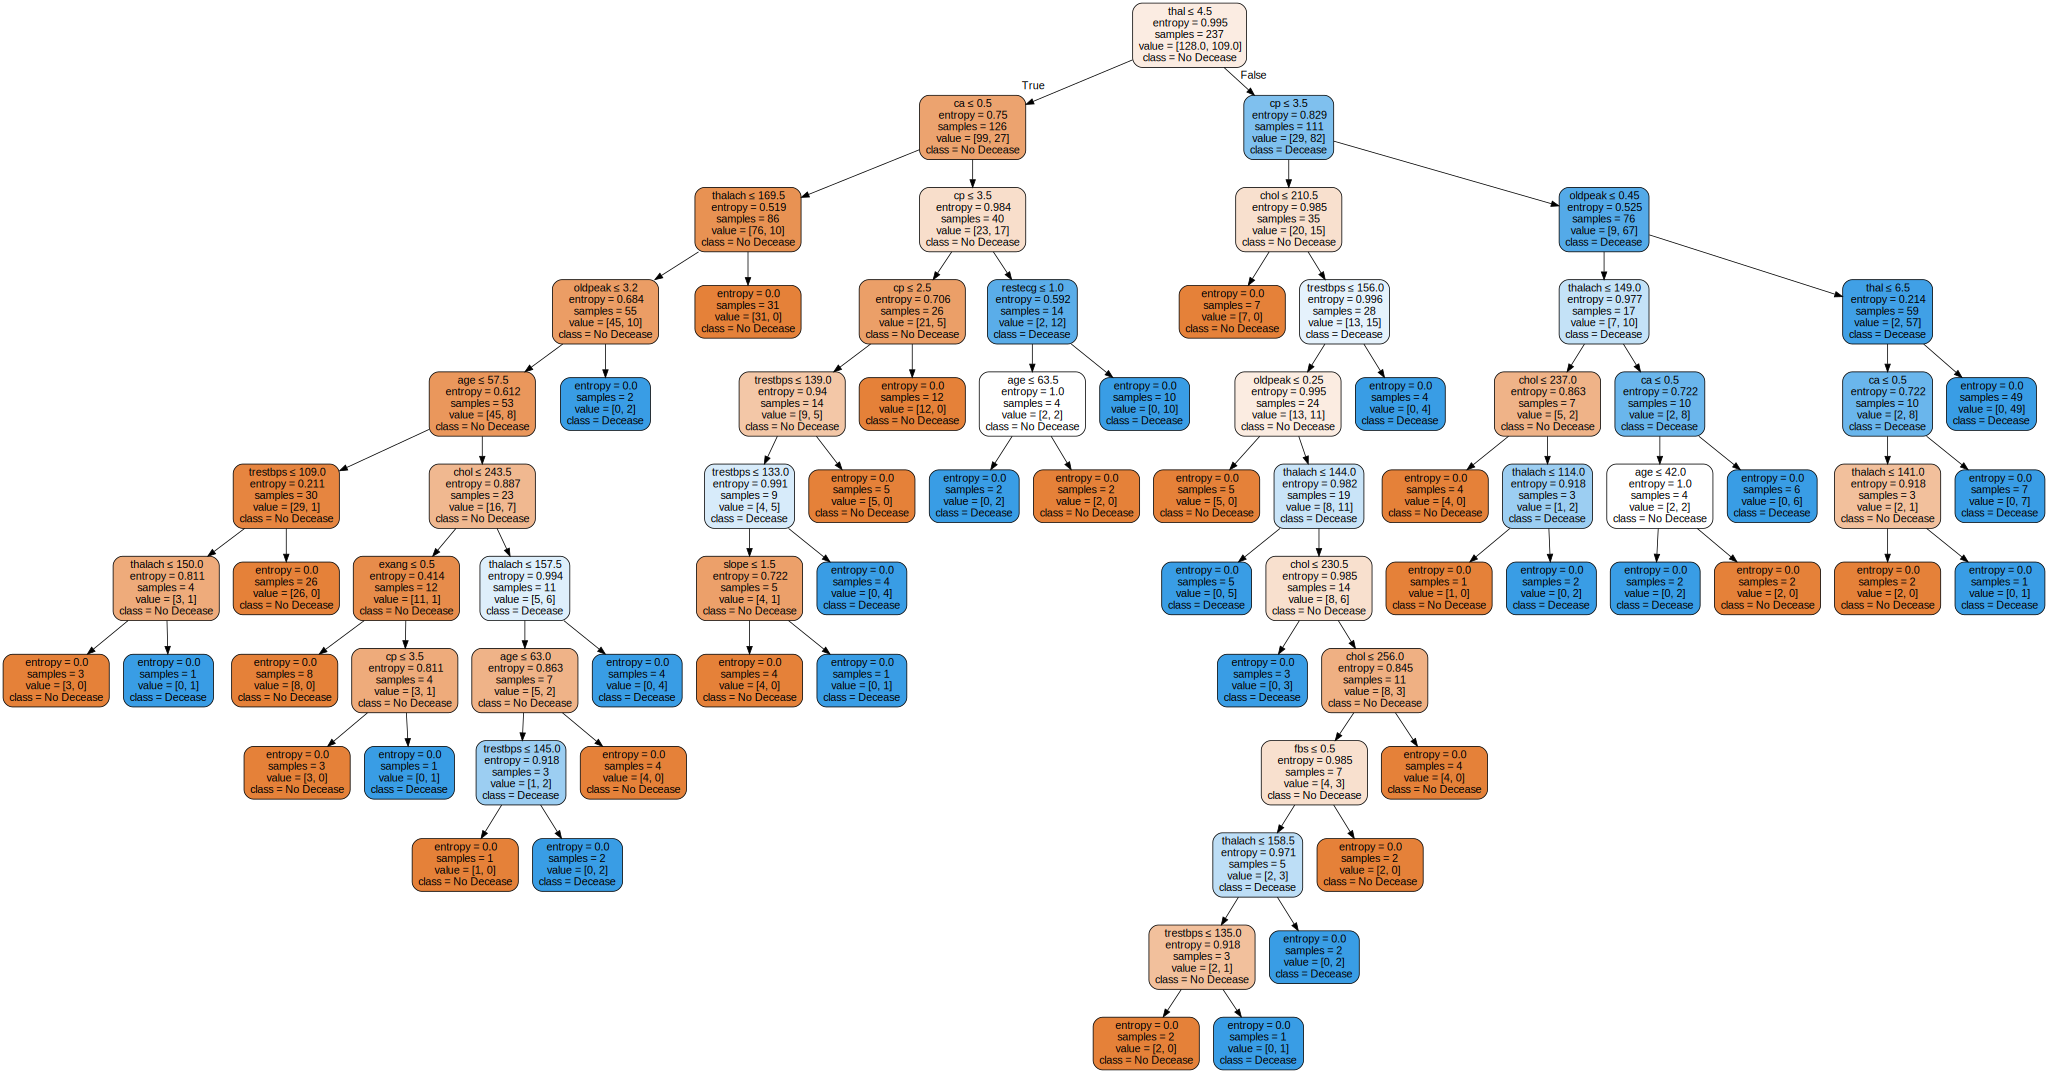

Max Depth: 2
Actual Depth: 2
Accuracy: 0.7167
Saved decision tree visualization: output/depth/heart_disease/heart_disease_80_20_depth_2.png


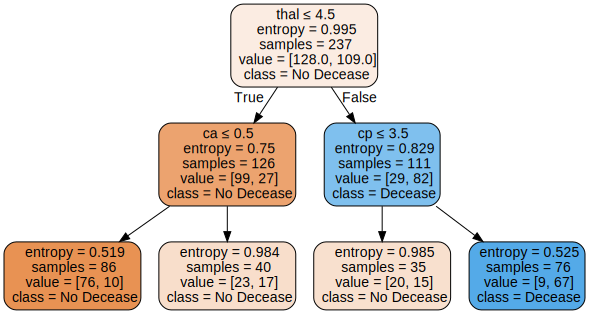

Max Depth: 3
Actual Depth: 3
Accuracy: 0.8167
Saved decision tree visualization: output/depth/heart_disease/heart_disease_80_20_depth_3.png


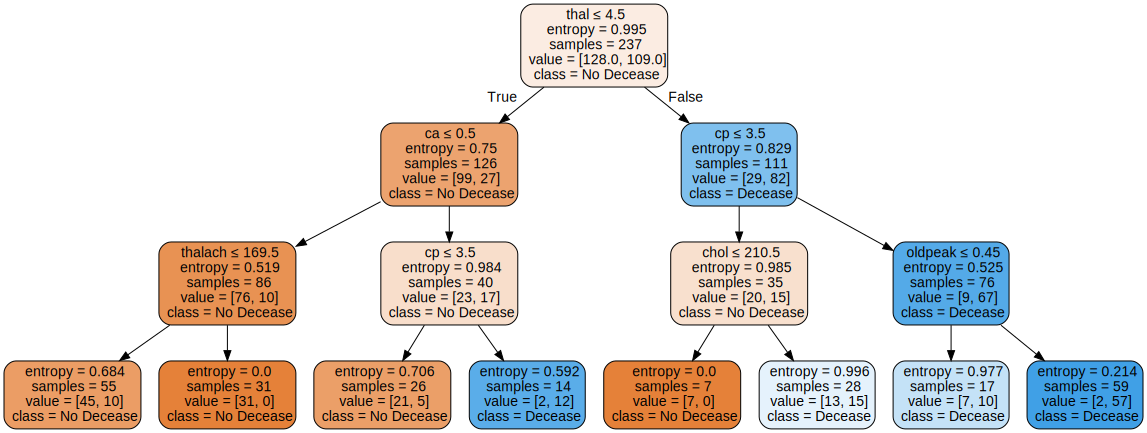

Max Depth: 4
Actual Depth: 4
Accuracy: 0.7667
Saved decision tree visualization: output/depth/heart_disease/heart_disease_80_20_depth_4.png


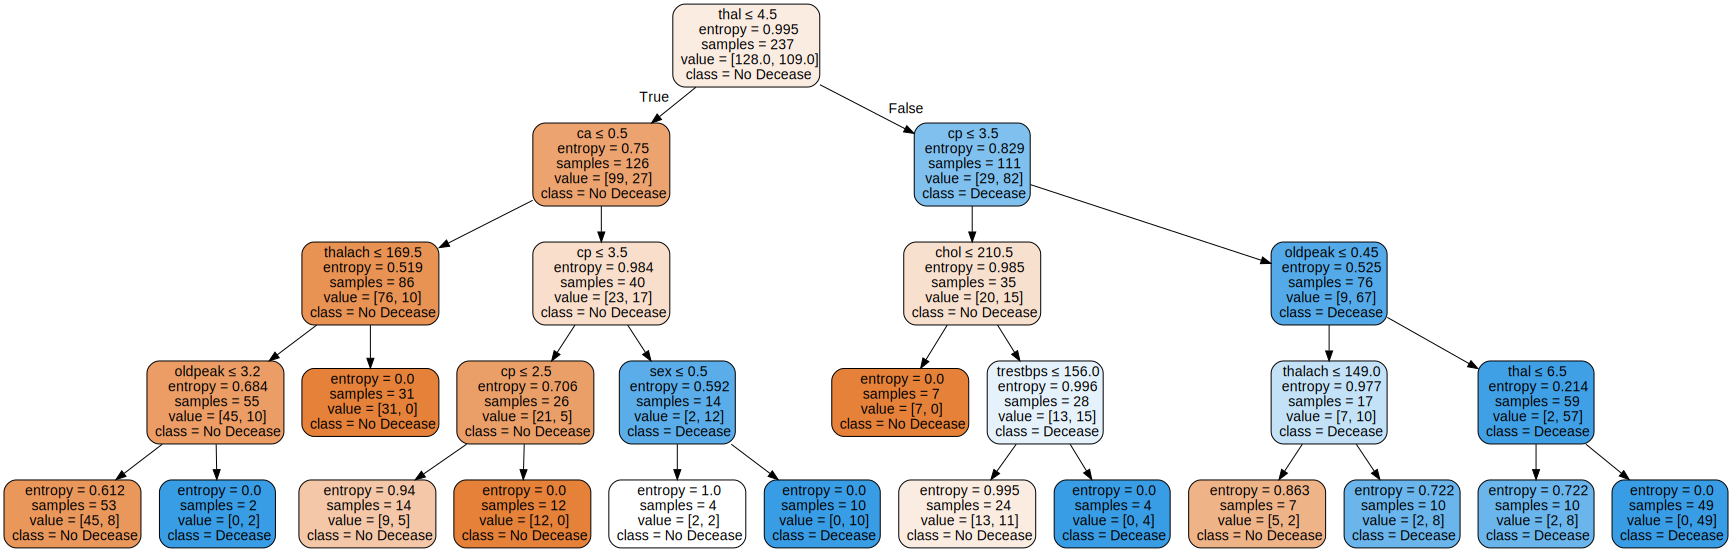

Max Depth: 5
Actual Depth: 5
Accuracy: 0.7667
Saved decision tree visualization: output/depth/heart_disease/heart_disease_80_20_depth_5.png


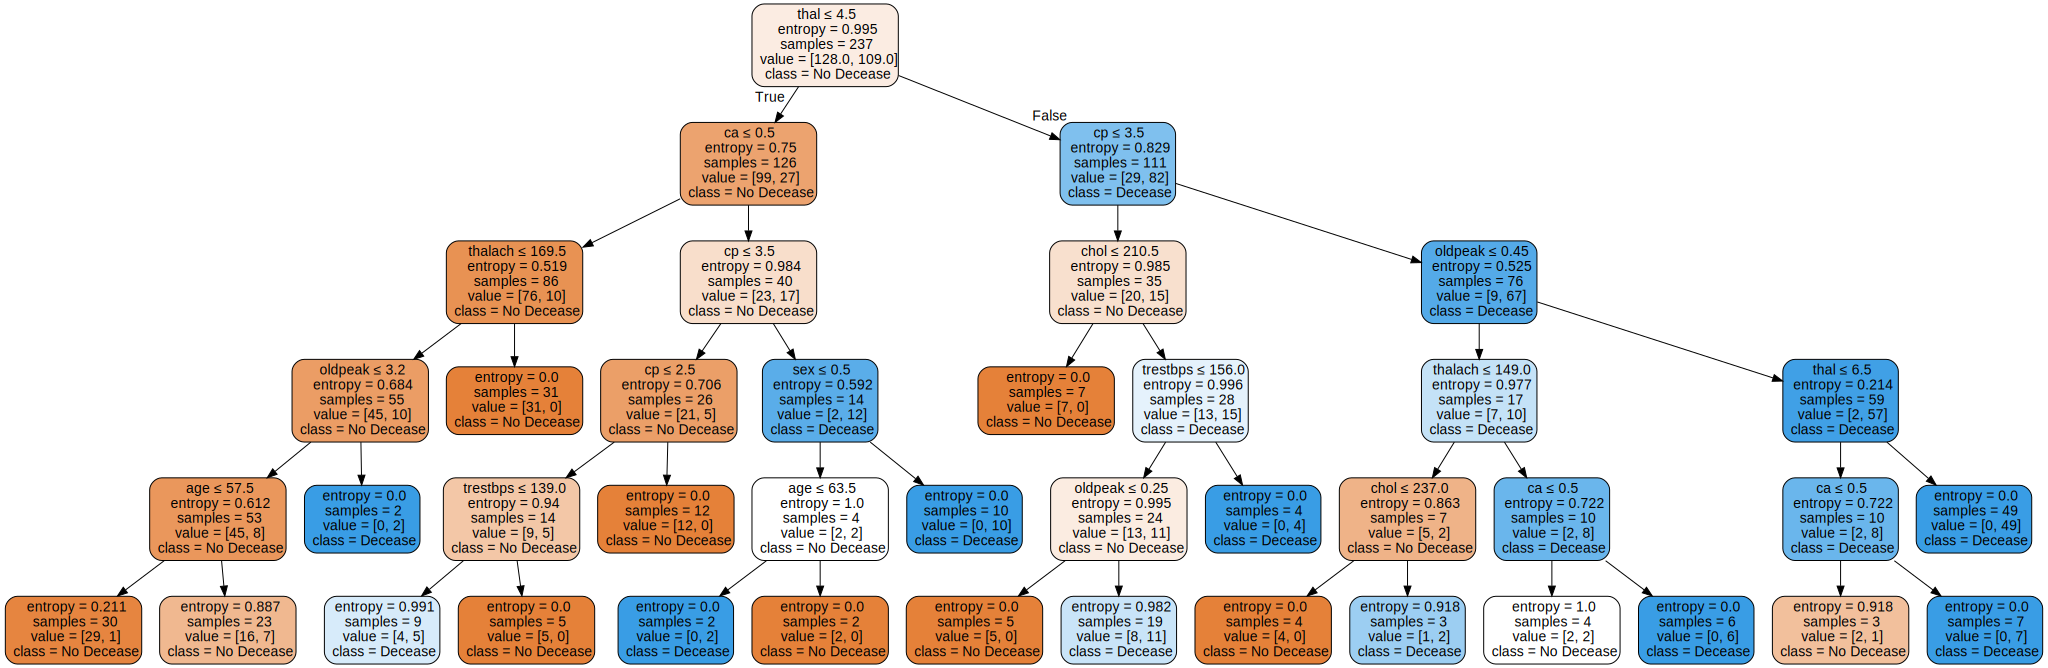

Max Depth: 6
Actual Depth: 6
Accuracy: 0.7333
Saved decision tree visualization: output/depth/heart_disease/heart_disease_80_20_depth_6.png


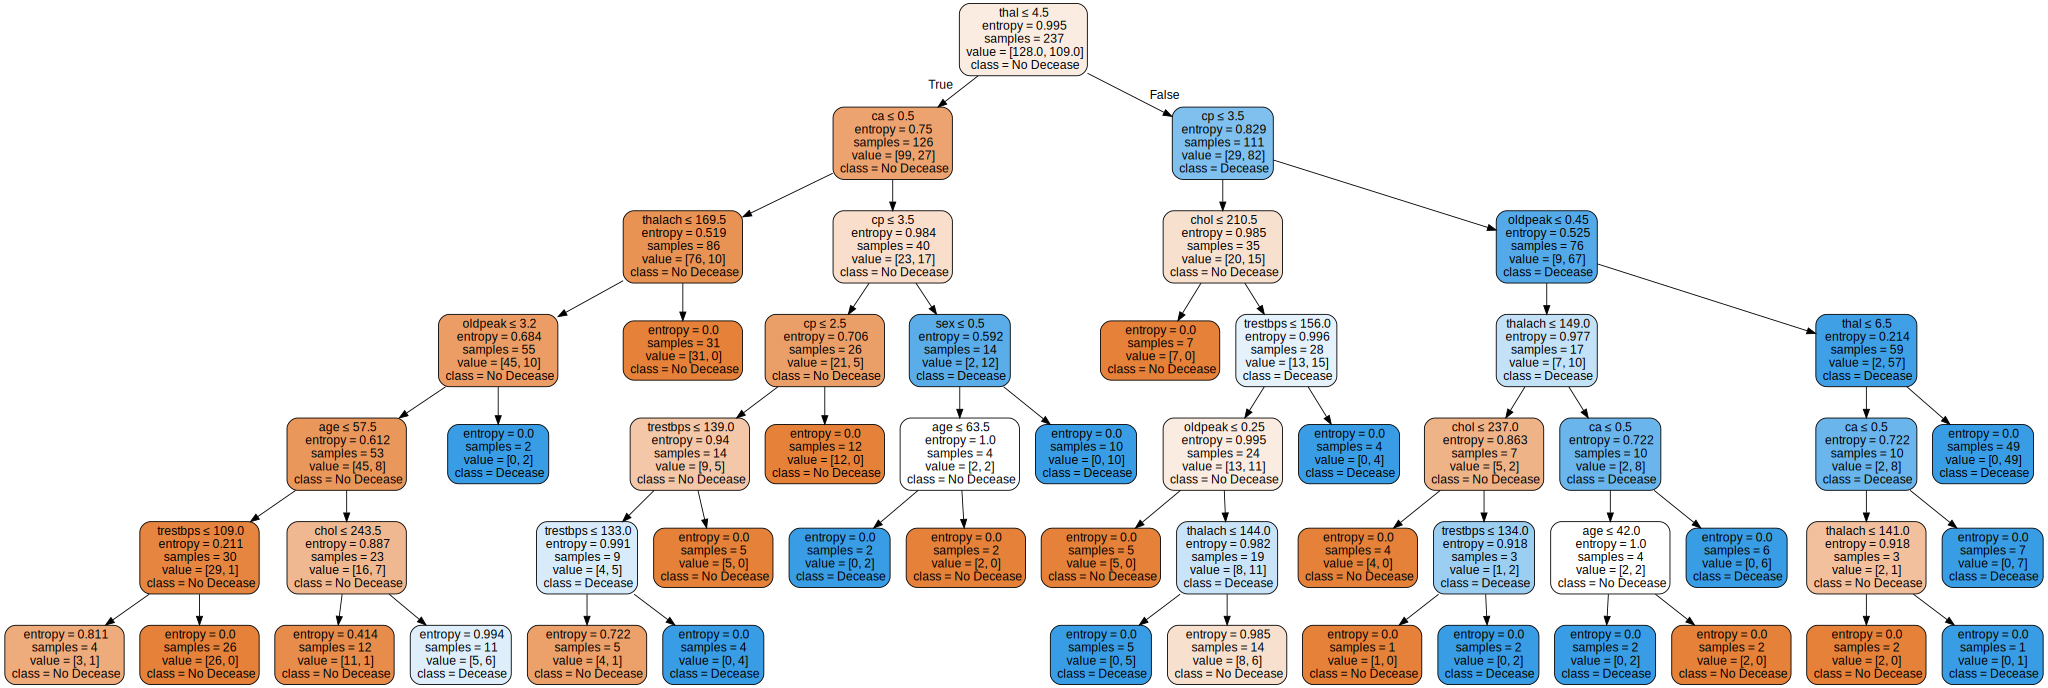

Max Depth: 7
Actual Depth: 7
Accuracy: 0.7667
Saved decision tree visualization: output/depth/heart_disease/heart_disease_80_20_depth_7.png


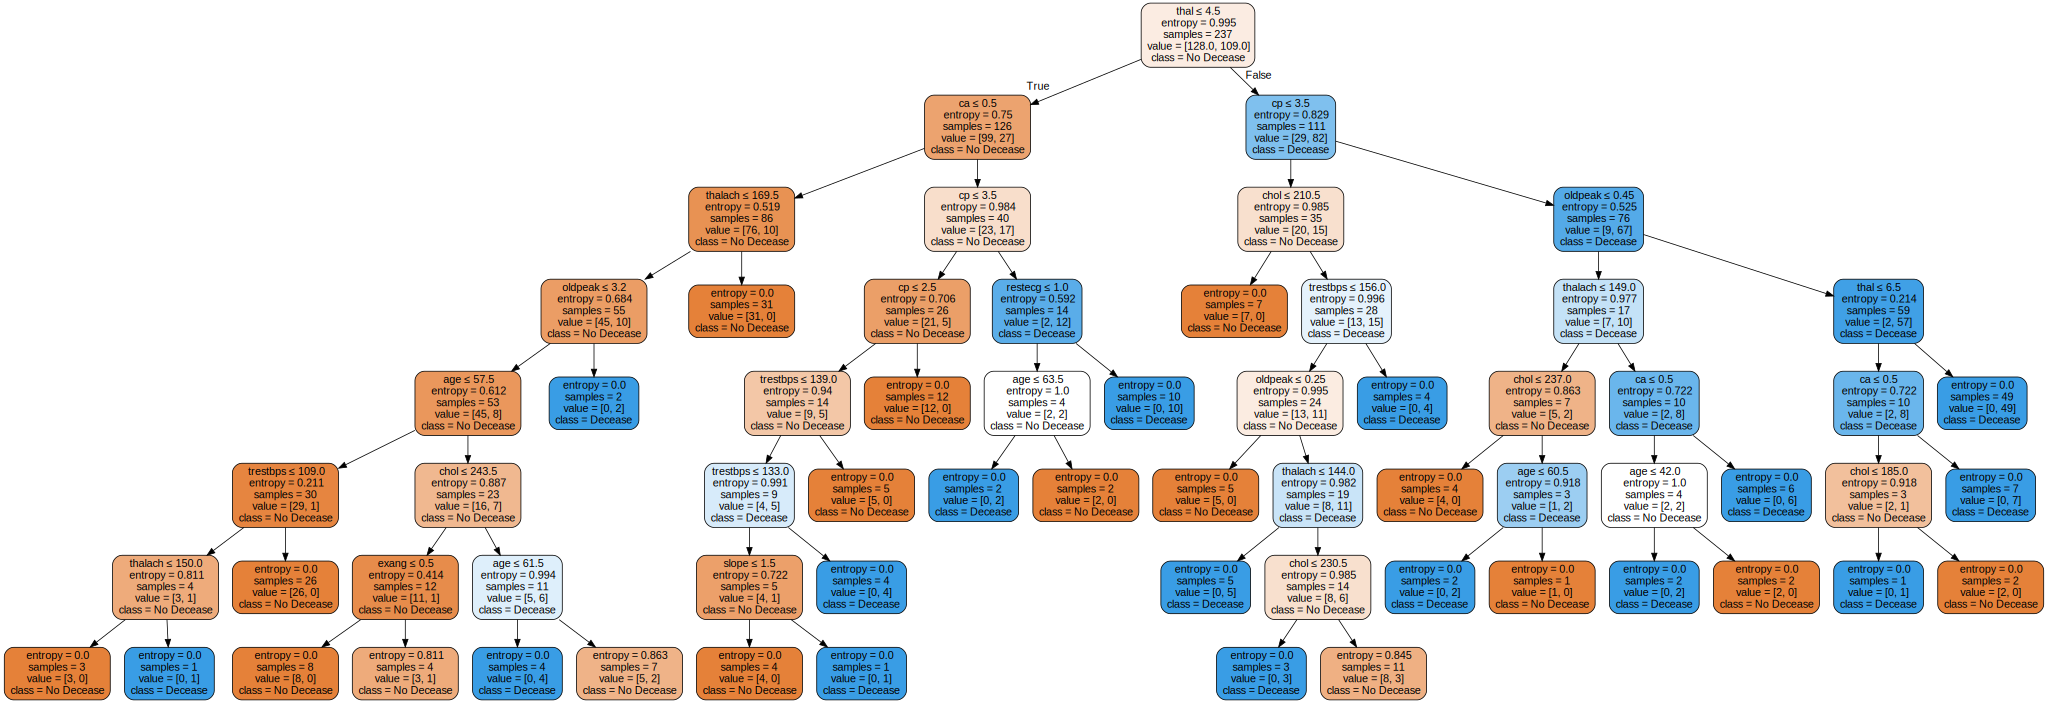

  max_depth  Accuracy
0      None  0.766667
1         2  0.716667
2         3  0.816667
3         4  0.766667
4         5  0.766667
5         6  0.733333
6         7  0.766667


In [45]:
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

def depth_analysis():
	depths = [None, 2, 3, 4, 5, 6, 7]
	accuracies = []

	feature_train, feature_test, label_train, label_test = dataset_splits[0.2]

	for d in depths:
		# Train decision tree with specified max_depth
		dts = train_and_evaluate(feature_train, label_train, max_depth=d)
		result_depth = dts.get_depth()
		label_predict = dts.predict(feature_test)
		acc = accuracy_score(label_test, label_predict)
		accuracies.append(acc)

		print(f"Max Depth: {d}\nActual Depth: {result_depth}\nAccuracy: {acc:.4f}")

		# Export decision tree to DOT format
		_dot_data = export_graphviz(dts, feature_names=feature_train.columns, class_names=class_name, filled=True, rounded=True, special_characters=True)
		_graph = graphviz.Source(_dot_data, format="png")

		def snake_case(s: str) -> str:
			return ''.join('_' if c.isspace() else c.lower() for c in s)

		snake_cased_dataset_name = snake_case(dataset_name)
		_output_file = f"output/depth/{snake_cased_dataset_name}/{snake_cased_dataset_name}_80_20_depth_{d if d is not None else "none"}"
		_graph.render(_output_file, cleanup=True, directory=".")
		print(f"Saved decision tree visualization: {_output_file}.png")
		display(_graph)
		# img = matplotlib.image.imread(f"{output_file}.png")
		# plt.figure(figsize=(12, 6), dpi=300)
		# plt.imshow(img)
		# plt.axis('off') # hide axis for cleaner plot
		# plt.title(f"Decision Tree ({dataset_name}, max_depth={d})")

	# Plot accuracies
	plt.figure(figsize=(10, 6), dpi=150)
	plt.plot([str(d) for d in depths], accuracies, marker='o')
	plt.title(f"Accuracy vs Max Depth ({dataset_name})")
	plt.xlabel("Max Depth")
	plt.ylabel("Accuracy")
	plt.grid()
	plt.savefig(f"accuracy_vs_depth_{dataset_name}.png", dpi=150)
	plt.close()
	accuracy_table = pd.DataFrame({'max_depth': [str(d) for d in depths], 'Accuracy': accuracies})
	print(accuracy_table)

depth_analysis()

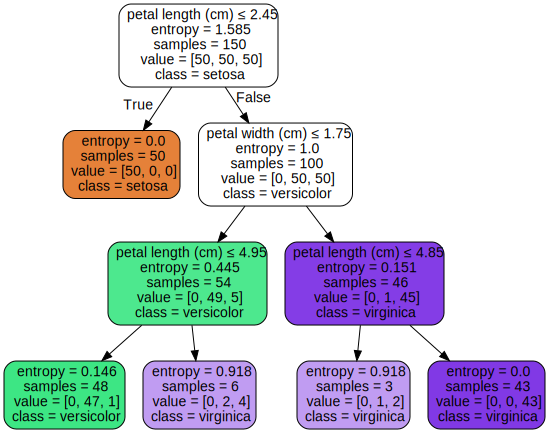

In [44]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source
from sklearn.datasets import load_iris
from IPython.display import display

# Load dataset (for example, Iris dataset)
data = load_iris()
X = data.data
y = data.target

# Train a decision tree classifier (ID3 - entropy criterion)
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X, y)

# Export the decision tree as a DOT file
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=data.feature_names,
                           class_names=data.target_names,
                           filled=True, rounded=True,
                           special_characters=True)

# Create a Graphviz Source object to render the DOT
graph = Source(dot_data)

# Display the decision tree
output_file = f"decision_tree_depth.png"
graph.render(output_file, cleanup=True, directory=".")

display(graph)


In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source
from IPython.display import Image, display

# Load dataset (for example, Iris dataset)
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target

# Train a decision tree classifier (ID3 - entropy criterion)
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X, y)

# Export the decision tree as a DOT file
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=data.feature_names,
                           class_names=data.target_names,
                           filled=True, rounded=True,
                           special_characters=True)

# Create a Graphviz Source object to render the DOT
graph = Source(dot_data)

output_file = "decision_tree_high_res"
graph.render(output_file, format='png', cleanup=True)

# Display the PNG image
display(Image(output_file + '.png'))
